In [1]:
import pandas as pd
import numpy  as np
import nltk

In [2]:
df=pd.read_csv(r"D:\project 1-fake_news_classifier\Dataset\WELFake_Dataset.csv")

In [3]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [4]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [7]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [8]:
df=df.drop(["Unnamed: 0"],axis=1)

In [9]:
df.reset_index(inplace=True)

In [10]:
df=df.drop(["index"],axis=1)

In [11]:
df["message"]=df["title"]+df["text"]

In [12]:
df

,title,text,label,message
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,About Time! Christian Group Sues Amazon and SP...
...,...,...,...,...
71532,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,Russians steal research on Trump in hack of U....
71533,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,WATCH: Giuliani Demands That Democrats Apolog...
71534,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,Migrants Refuse To Leave Train At Refugee Camp...
71535,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0,Trump tussle gives unpopular Mexican leader mu...


In [13]:
df=df.drop(["title","text"],axis=1)

In [14]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer 
import re

In [15]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

ps = PorterStemmer()
stop_words = set(stopwords.words("english"))

data = []

for i in range(len(df["message"])):
    review = re.sub("[^a-zA-Z]", " ", df["message"][i])
    review = review.lower()
    words = review.split()
    
    sentence = [ps.stem(w) for w in words if w not in stop_words]
    data.append(" ".join(sentence))
    
    if i % 100 == 0:
        print(f"Messages processed: {i}")

Messages processed: 0
Messages processed: 100
Messages processed: 200
Messages processed: 300
Messages processed: 400
Messages processed: 500
Messages processed: 600
Messages processed: 700
Messages processed: 800
Messages processed: 900
Messages processed: 1000
Messages processed: 1100
Messages processed: 1200
Messages processed: 1300
Messages processed: 1400
Messages processed: 1500
Messages processed: 1600
Messages processed: 1700
Messages processed: 1800
Messages processed: 1900
Messages processed: 2000
Messages processed: 2100
Messages processed: 2200
Messages processed: 2300
Messages processed: 2400
Messages processed: 2500
Messages processed: 2600
Messages processed: 2700
Messages processed: 2800
Messages processed: 2900
Messages processed: 3000
Messages processed: 3100
Messages processed: 3200
Messages processed: 3300
Messages processed: 3400
Messages processed: 3500
Messages processed: 3600
Messages processed: 3700
Messages processed: 3800
Messages processed: 3900
Messages pro

In [16]:
len(data)

71537

In [17]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
x=cv.fit_transform(data).toarray()

In [18]:
x.shape

(71537, 5000)

In [19]:
cv.get_feature_names_out().shape

(5000,)

In [20]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [21]:
count_df=pd.DataFrame(x,columns=cv.get_feature_names_out())

In [22]:
count_df.iloc[20]

abandon     0
abc         0
abc news    0
abe         0
abedin      0
           ..
zika        0
zimbabw     0
zionist     0
zone        0
zuma        0
Name: 20, Length: 5000, dtype: int64

In [23]:
y=df["label"].values

In [24]:
y

array([1, 1, 0, ..., 0, 0, 1], shape=(71537,))

In [25]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(71537, 5000))

In [26]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train.shape

(57229, 5000)

In [30]:
classifier.fit(x_train,y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [31]:
pred=classifier.predict(x_test)

In [32]:
from sklearn import metrics
import itertools
score=metrics.accuracy_score(pred,y_test)

In [33]:
score

0.8837014257757898

Confusion matrix, without normalization


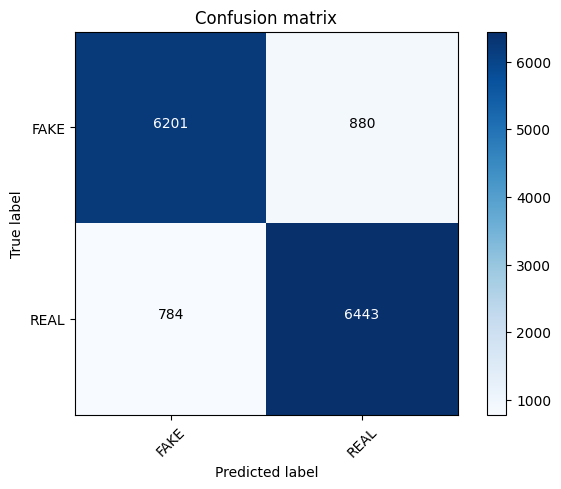

In [34]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [80]:

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier,LogisticRegression
import xgboost



knn_classifier=KNeighborsClassifier(n_neighbors = 3)


sgd_classifier=SGDClassifier()


svc_classifier =SVC(kernel="rbf")

gaussian_classifier=GaussianNB()

xgboost_classifier=xgboost.XGBClassifier(
                            n_estimators=200,        # number of trees
                            learning_rate=0.1,       # step size shrinkage
                            max_depth=6,             # depth of each tree
                            subsample=0.8,           # row sampling
                            colsample_bytree=0.8,    # feature sampling
                            random_state=42,
                            eval_metric="mlogloss"   # for multi-class classification
)


Perceptron_classifier=Perceptron()

logistic_regression= LogisticRegression(max_iter=1000)

gaussian_classifier.fit(x_train,y_train)
print("training completed Gaussian")
xgboost_classifier.fit(x_train,y_train)
print("training completed xgboost")
Perceptron_classifier.fit(x_train,y_train)
print("training completed Perceptron")


knn_classifier.fit(x_train,y_train)
print("training completed KNN")
sgd_classifier.fit(x_train,y_train)
print("training completed sgd")

logistic_regression.fit(x_train,y_train)
print("training completed LogisticRegression")




training completed Gaussian
training completed xgboost
training completed Perceptron
training completed KNN
training completed sgd
training completed LogisticRegression


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
def classification_evaluation(model,x_test,y_test,title="Model"):
    y_pred = model.predict(x_test)

    print(f"--------{title}---------")
    # Metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average="weighted"))
    print("Recall:", recall_score(y_test, y_pred, average="weighted"))
    print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))

    # Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Detailed Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [82]:
print(classification_evaluation(knn_classifier,x_test,y_test,title="KNN"))
print(classification_evaluation(sgd_classifier,x_test,y_test,title="SGD"))
print(classification_evaluation(gaussian_classifier,x_test,y_test,title="Gaussian"))
print(classification_evaluation(xgboost_classifier,x_test,y_test,title="XGBoost"))
print(classification_evaluation(Perceptron_classifier,x_test,y_test,title="Perceptron"))
print(classification_evaluation(logistic_regression,x_test,y_test,title="logistic"))

--------KNN---------
Accuracy: 0.8033268101761253
Precision: 0.8063352263434049
Recall: 0.8033268101761253
F1 Score: 0.8027070390344496
Confusion Matrix:
 [[5308 1773]
 [1041 6186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      7081
           1       0.78      0.86      0.81      7227

    accuracy                           0.80     14308
   macro avg       0.81      0.80      0.80     14308
weighted avg       0.81      0.80      0.80     14308

None
--------SGD---------
Accuracy: 0.9470925356443948
Precision: 0.9471845346504915
Recall: 0.9470925356443948
F1 Score: 0.9470855372374057
Confusion Matrix:
 [[6649  432]
 [ 325 6902]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7081
           1       0.94      0.96      0.95      7227

    accuracy                           0.95     14308
   macro avg       0.95      0.95   

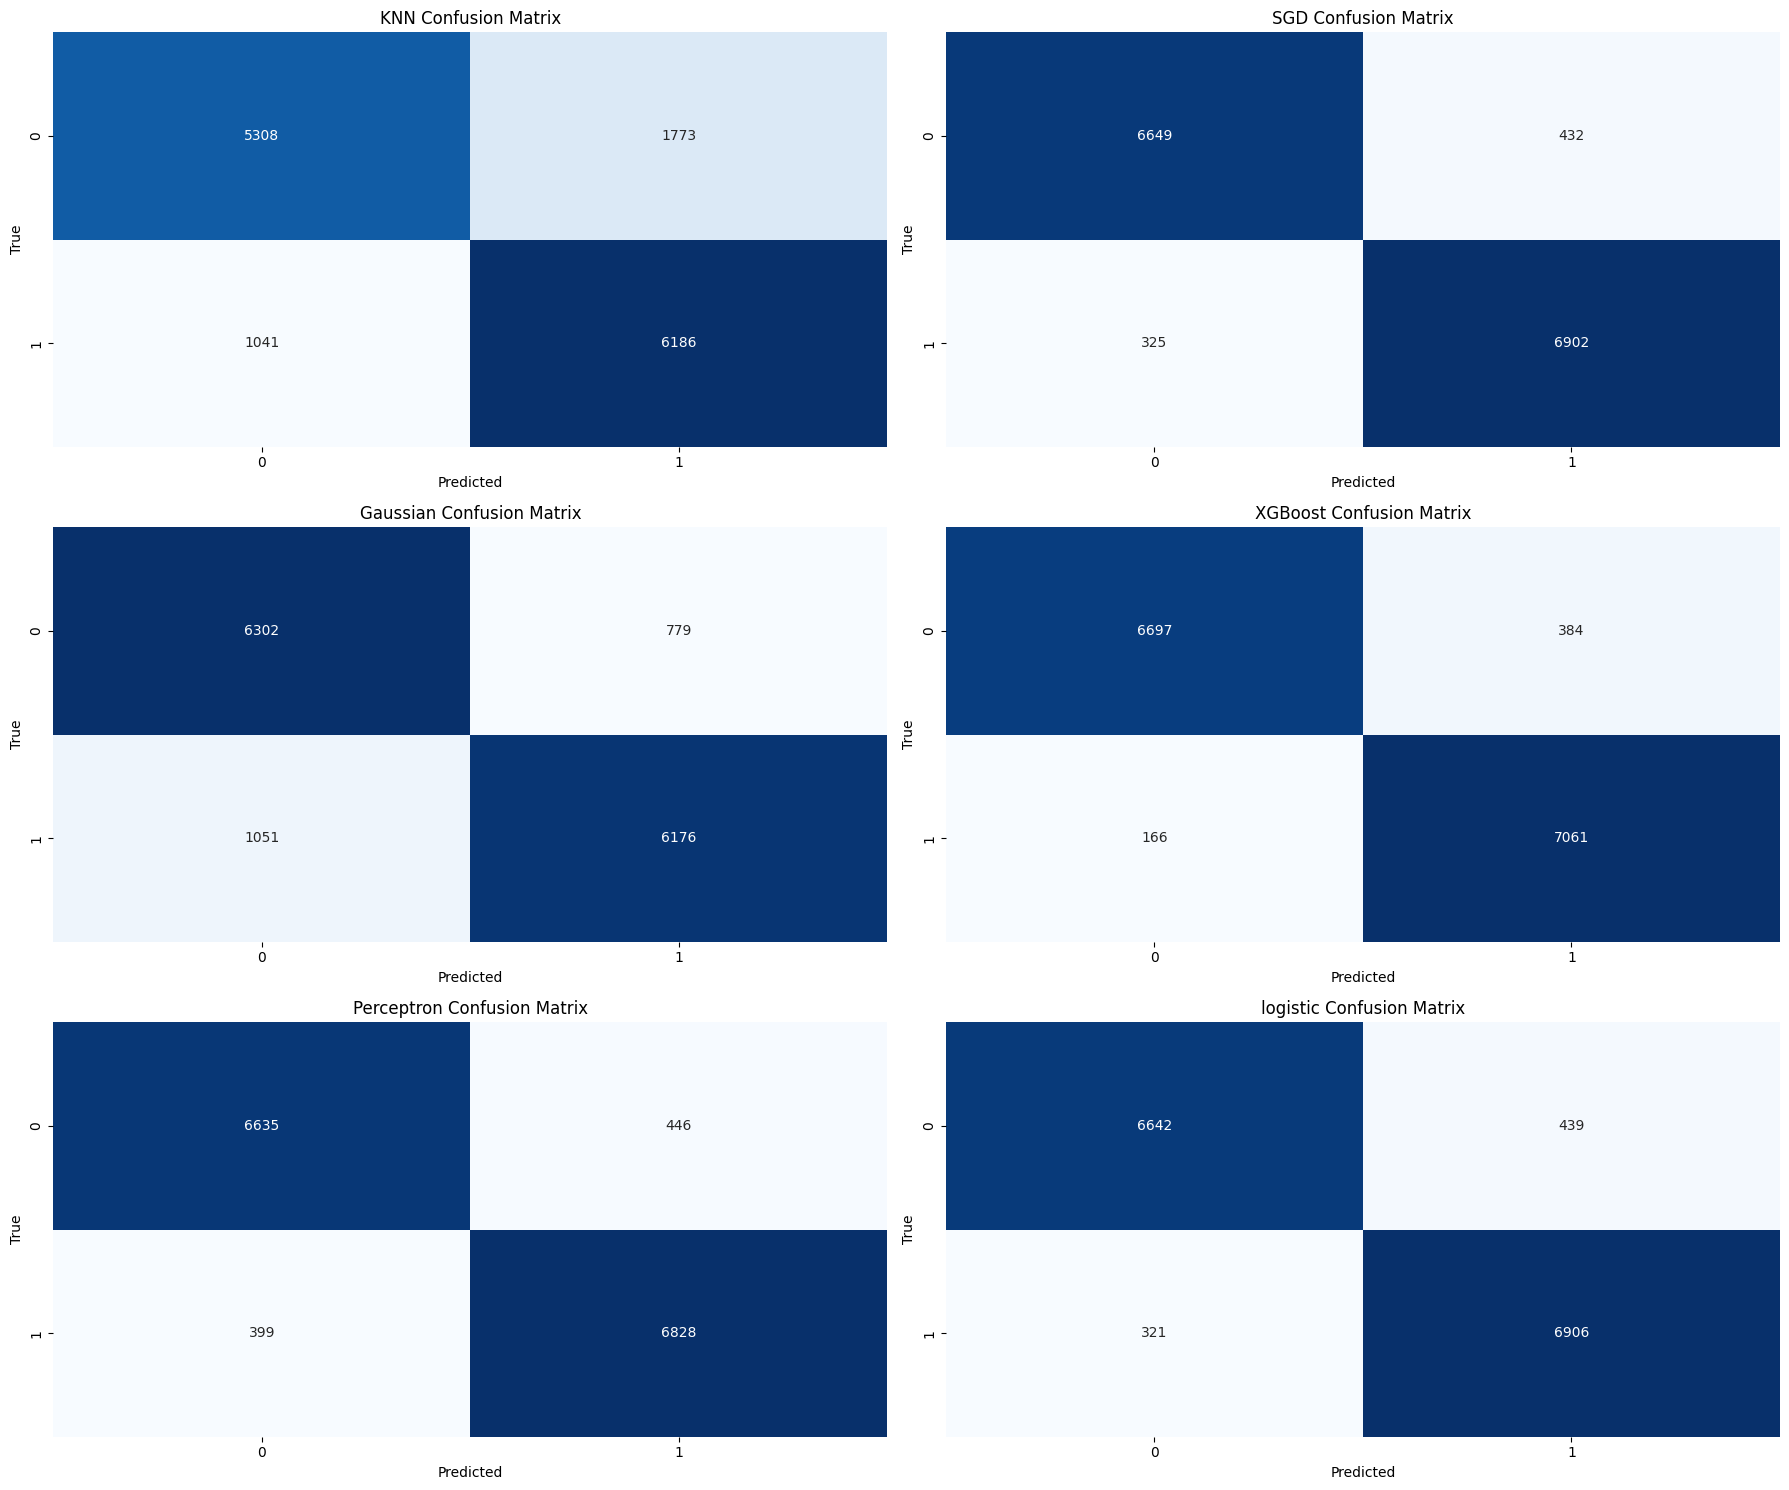

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "KNN": knn_classifier,
    "SGD": sgd_classifier,
    "Gaussian": gaussian_classifier,
    "XGBoost": xgboost_classifier,
    "Perceptron":Perceptron_classifier,
    "logistic":logistic_regression
}

# Create 2x3 subplot grid
fig, axes = plt.subplots(3,2, figsize=(18, 15))

# Flatten axes for easy iteration
axes = axes.flatten()

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()

In [69]:
def prediction(title,text):
    message=title+text
    data=re.sub("[^a-zA-Z]"," ",message)
    review=data.lower()
    words=data.split()
    sentence=[ps.stem(word) for word in words if word not in set(stopwords.words("english"))]
    stem_word=" ".join(sentence)
    count_vc=cv.transform([stem_word]).toarray()
    pred=xgboost_classifier.predict(count_vc)
    if pred[0]==1:
        return "Fake News"
    else:
        return "Real News"
    


In [70]:
df1=pd.read_csv("D:\project 1-fake_news_classifier\Dataset\WELFake_Dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HP\AppData\Local\Temp\ipykernel_8792\161334310.py:1: SyntaxWarning: invalid escape sequence '\p'
  df1=pd.read_csv("D:\project 1-fake_news_classifier\Dataset\WELFake_Dataset.csv")


In [75]:
a=df1["title"][3]
b=df1["text"][3]

In [77]:
b

'A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”\n\nOver two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save my soul,” reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.\n\n“I was struck, and struck hard,” Jindal told the pastors. “This was the Son of God, and He had died for our sins.”\n\nJindal’s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to find a political base that could help propel him into the top tier of Republican candidates seeking t

In [78]:
prediction(a,b)

'Real News'

In [85]:
import joblib
joblib.dump(xgboost_classifier, "xgboost_model.pkl")
joblib.dump(cv, "count_vectorizer.pkl")

['count_vectorizer.pkl']